# Fit Hologram parameters For AuxTel

- author : Sylvie Dagoret-Campagne
- affiliation : IJCLab/IN2P3/CNES, DESC-LSST fullmember, behalf AuxTel Teal VERA C. Rubin observatory
- creation date : February 18th 2021

# Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from mpl_toolkits.axes_grid1 import make_axes_locatable
import pandas as pd

import matplotlib.ticker                         # here's where the formatter is


plt.rcParams["figure.figsize"] = (16,4)
plt.rcParams["axes.labelsize"] = 'xx-large'
plt.rcParams['axes.titlesize'] = 'xx-large'
plt.rcParams['xtick.labelsize']= 'xx-large'
plt.rcParams['ytick.labelsize']= 'xx-large'

# constants

- all transverse physical coordinates are in mm and relative to beam optical center (at CCD center)

In [2]:
# conversion in good inits
u_radtodeg=180.0/np.pi
u_degtorad=np.pi/180.
u_mtomm=1e3

- all constants are refered as $c\_$

In [3]:
c_F=18.0*1.2*u_mtomm # Auxtel Focla length # ou 13.7m

In [4]:
c_F

21599.999999999996

In [5]:
c_Z1=200. # mm, distance between hologram and source plane during holo recording
c_Z0=200. # mm, distance between hologram and CCD plane for observations 

In [6]:
c_d1=20.0 # mm, disntance between the sources during recording 

In [7]:
c_x1_0=7  # mm , x-coordinates of the hologram optical center in the CCD ref frame
c_y1_0=5 # mm , y-coordinate of the hologram optical center in the CCD ref frame

In [8]:
c_alpha0=10 #degree , angle of rotation of hologram source axis wrt CCD  

# Functions

- $(X,Y)$ : coordinates in CCD frame with telecope optical center as the origin
- $(x,y)$ : coordinates in hologram frame with telecope optical center as the origin the same reference axis as the CCD
- $(x_1,y_1)$ : coordinates in hologram reference frame, with telecope optical center as the origin, such the two sources A $(x_1(A),y_1(A))$ and B $(x_1(B),y_1(B))$ have coordinates:
$$
x_1(A)= x_1 (0)-d_1/2 
$$
$$
y_1(A)= y_1(0)
$$
$$
x_1(B)= x_1 (0)+d_1/2 
$$
$$
y_1(B)= y_1(0)
$$

In [9]:
def XYtoxy(XY,Z):
    """
    XYtoxy(XY,Z): convert coordinates in CCD plane to coordinates in hologram frame (same ref axis as CCD)
    
    input parameters
    - XY : numpy array of the 2-coordinates in CCD in mm
    - Z : distance between hologram and CCD in mm (positive)
    
    output parameter 
    - xy : numpy array of the 2-coordinates in  in mm
    """
    XY=np.array(XY)
    xy=(1-Z/c_F)*XY
    
    return xy  

In [10]:
def xytoXY(xy,Z):
    """
    xytoXY(xy,Z): convert coordinates in hologram frame (same ref axis as CCD) to CCD frame
    
     input parameters
    - xy : numpy array of the 2-coordinates in  in mm
    - Z : distance between hologram and CCD in mm (positive)
    
    output parameter 
    - XY : numpy array of the 2-coordinates in CCD in mm
    
    """
    xy=np.array(xy)
    XY=1./(1-Z/c_F)*xy
    
    return XY  

In [11]:
def xytox1y1(xy,alpha,x0,y0):
    """
    xytox1y1(xy,alpha): convert coordinates in hologram frame (same ref axis as CCD) to an instrinsic hologram frame
    by an angle alpha (goal new axis should be x1 axis parallel to sources A,B)
    
    input parameters
    - xy : numpy array of the 2-coordinates in hologram which ref axis are those of CCD mm
    - alpha : angle in degree
    
    - (x0,y0) : coordinate of O1 in CCD axis frame
    
    output parameter 
    - x1y1 : mm, numpy array of the 2-coordinates in the intrinsic hologram frame
    
    """
    
    cos_alpha=np.cos(alpha*u_degtorad)
    sin_alpha=np.sin(alpha*u_degtorad)
    x=xy[0]-x0
    y=xy[1]-y0
    
    x1y1=np.array([cos_alpha*x+sin_alpha*y,-sin_alpha*x+cos_alpha*y])
    return x1y1

In [12]:
def xytox1y1_2D(x,y,alpha,x0,y0):
    """
    xytox1y1_2d(x,y,alpha): convert coordinates in hologram frame (same ref axis as CCD) to an instrinsic hologram frame
    by an angle alpha (goal new axis should be x1 axis parallel to sources A,B)
    
    input parameters
    - x,y : 2D-numpy array of the 2-coordinates in hologram which ref axis are those of CCD mm
    - alpha : angle in degree
    
    output parameter 
    - x1,y1 : mm, 2D-numpy array of the 2-coordinates in the intrinsic hologram frame
    
    """
    
    cos_alpha=np.cos(alpha*u_degtorad)
    sin_alpha=np.sin(alpha*u_degtorad)
    
    x=x-x0
    y=y-y0
    
    x1=cos_alpha*x+sin_alpha*y
    y1=-sin_alpha*x+cos_alpha*y
    return x1,y1

In [13]:
def x1y1toxy(x1y1,alpha,x0,y0):
    """
    x1y1toxy(x1y1,alpha): convert coordinates in the intrinsic hologram frame  to the hologram frame 
    with same axis as CCD
    by an angle alpha 
    
    input parameters
    - x1y1 : mm, numpy array of the 2-coordinates in the intrinsic hologram frame  
    - alpha : angle in degree
    
    output parameter 
     - xy : numpy array of the 2-coordinates in hologram which ref axis are those of CCD mm
   
    
    """
    
    cos_alpha=np.cos(alpha*u_degtorad)
    sin_alpha=np.sin(alpha*u_degtorad)
    
    x1=x1y1[0]
    y1=x1y1[1]
    
    xy=np.array([cos_alpha*x1-sin_alpha*y1+x0,sin_alpha*x1+cos_alpha*y1+y0])
    return xy

In [14]:
def x1y1toxy_2D(x1,y1,alpha,x0,y0):
    """
    x1y1toxy_2D(x1,y1,alpha): convert coordinates in the intrinsic hologram frame  to the hologram frame 
    with same axis as CCD
    by an angle alpha 
    
    input parameters
    - x1,y1 : mm, 2D numpy array of the 2-coordinates in the intrinsic hologram frame  
    - alpha : angle in degree
    
    output parameter 
     - x,y : 2D numpy array of the 2-coordinates in hologram which ref axis are those of CCD mm
   
    
    """
    
    cos_alpha=np.cos(alpha*u_degtorad)
    sin_alpha=np.sin(alpha*u_degtorad)
    
    
    x=cos_alpha*x1-sin_alpha*y1+x0
    y=sin_alpha*x1+cos_alpha*y1+y0
    return x,y

In [15]:
def dist1_to_source(xy,xy_s):
    """
    dist1_to_source(xy,xy_s) : distance between a point M(x,y) to a source S(x_S,y_s) at hologram recording phase
    
    The alpha hologram rotation angle is not important provided both point M and source S have the same reference axis
    
     input parameters
    - xy   : mm, 1D-numpy array of the 2-coordinates of point M in the  hologram frame  
    - xy_s : mm, 1D-numpy array of the 2-coordinates of the source in the  hologram frame  
    
    
    output parameter:
    return the 3d distance 
    
    """
    
    return np.sqrt(c_Z1**2+ (xy[0]-xy_s[0])**2+ (xy[1]-xy_s[1])**2)

In [16]:
def ddist1_to_source(x,y,x_s,y_s):
    """
    ddist1_to_source(xy,xy_s) : distance between a point M(x,y) to a source S(x_S,y_s) at hologram recording phase
    
    more efficient than dist1_to_source(xy,xy_s) because x,y are 2D numpy arrays.
    
    The alpha hologram rotation angle is not important provided both point M and source S have the same reference axis
    
     input parameters
    - x,y   : mm, 2D-numpy array of the 2-coordinates of point M in the  hologram frame  
    - x,y_s : mm, scalar the 2-coordinates of the source in the  hologram frame  
    
    
    output parameter:
    return the distance in 3D in a 2D numpy array
    
    Note : Either (x,y) are 2 2D-numpy array and (x_s,y_s) are 2 scalars 
           Or  (x,y) are 2 scalars and (x_s,y_s) are 2 2D-numpy arrays
    
    """
    
    return np.sqrt(c_Z1**2 + (x-x_s)**2+ (y-y_s)**2)

In [17]:
def d_phi(x1y1):
    """  
    d_phi(x1y1) : angle d_alpha of hologram dispersion axis un hologram intrinsic reference frame
    
    input parameters
    - x1y1   : mm, numpy array of the 2-coordinates of point M in the  intrinsic hologram frame  
         
    output parameter:
    return the angle d_alpha in degree
    
    """
    
    
    x1y1_A=np.array([-c_d1/2, 0]) # coordinate of source A
    x1y1_B=np.array([+c_d1/2, 0]) # coordinate of source B
    
    d1_A=dist1_to_source(x1y1,x1y1_A)  # distance to source A
    d1_B=dist1_to_source(x1y1,x1y1_B)  # distance to source B
    
    d_phi=d1_A-d1_B
   
    
    return d_phi

In [18]:
def dd_phi(x1,y1):
    """
    dd_alpha(x1,y1) : angle d_alpha of hologram dispersion axis un hologram intrinsic reference frame
    
    more efficient than d_alpha(x1y1,x1y1_0) because x1,y1 are a 2D numpy array
    
    input parameters are 2D numpy array
    - x1,y1   : mm, 2D numpy array of the 2-coordinates of point M in the  intrinsic hologram frame  
     
    
    output parameter:
    return the angle d_alpha in degree in a 2D numpy array
    
    
    Notes :
     - Either (x1,y1) may be 2 2D-numpy arrays and x1_0,y1_0 two scalars : to get the d_alpha(x1,y1)
     - Or fix (x1,y1) as two scalars where the angle is measured and (x1_0,y1_0) are 2 2D numpy arrays
     for scanning in chi2 function the best position for parameters (x1_0,y1_0) 
    
    """
    
    
    x1_A=-c_d1/2 # coordinate of source A
    y1_A=0.        # coordinate of source A
    
    x1_B=c_d1/2 # coordinate of source B
    y1_B=0        # coordinate of source B
    
    dd1_A=ddist1_to_source(x1,y1,x1_A,y1_A)  # distance to source A in a 2D numpy array
    dd1_B=ddist1_to_source(x1,y1,x1_B,y1_B)  # distance to source B
    
    
    dd_phi=dd1_A-dd1_B
    
    return dd_phi # in a 2D numpy array

In [19]:
def d_alpha(x1y1):
    """
    d_alpha(x1y1) : angle d_alpha of hologram dispersion axis un hologram intrinsic reference frame
    
    
    input parameters
    - x1y1   : mm, numpy array of the 2-coordinates of point M in the  intrinsic hologram frame  
    
     
    output parameter:
    return the angle d_alpha in degree
    
    """
    
    
    x1y1_A=np.array([-c_d1/2, 0]) # coordinate of source A
    x1y1_B=np.array([+c_d1/2, 0]) # coordinate of source B
    
    d1_A=dist1_to_source(x1y1,x1y1_A)  # distance to source A
    d1_B=dist1_to_source(x1y1,x1y1_B)  # distance to source B
    
    
    num_tan_dalpha= d1_B*(x1y1[1]-x1y1_A[1])-d1_A*(x1y1[1]-x1y1_B[1])
    den_tan_dalpha= d1_B*(x1y1[0]-x1y1_A[0])-d1_A*(x1y1[0]-x1y1_B[0])
    
    #tan_dalpha=- num_tan_dalpha/den_tan_dalpha
    tan_dalpha= num_tan_dalpha/den_tan_dalpha
    
    d_alpha=u_radtodeg*np.arctan(tan_dalpha)
    
    return d_alpha

In [20]:
def dd_alpha(x1,y1):
    """
    dd_alpha(x1,y1) : angle d_alpha of hologram dispersion axis un hologram intrinsic reference frame
    
    more efficient than d_alpha(x1y1,x1y1_0) because x1,y1 are a 2D numpy array
    
    input parameters are 2D numpy array
    - x1,y1   : mm, 2D numpy array of the 2-coordinates of point M in the  intrinsic hologram frame  
     
    
    output parameter:
    return the angle d_alpha in degree in a 2D numpy array
    
    
    Notes :
     - Either (x1,y1) may be 2 2D-numpy arrays and x1_0,y1_0 two scalars : to get the d_alpha(x1,y1)
     - Or fix (x1,y1) as two scalars where the angle is measured and (x1_0,y1_0) are 2 2D numpy arrays
     for scanning in chi2 function the best position for parameters (x1_0,y1_0) 
    
    """
    
    
    x1_A=-c_d1/2 # coordinate of source A
    y1_A=0.        # coordinate of source A
    
    x1_B=c_d1/2 # coordinate of source B
    y1_B=0        # coordinate of source B
    
    dd1_A=ddist1_to_source(x1,y1,x1_A,y1_A)  # distance to source A in a 2D numpy array
    dd1_B=ddist1_to_source(x1,y1,x1_B,y1_B)  # distance to source B
    
    
    num_tan_dalpha= dd1_B*(y1-y1_A)-dd1_A*(y1-y1_B)
    den_tan_dalpha= dd1_B*(x1-x1_A)-dd1_A*(x1-x1_B)
    
    #tan_dalpha=- num_tan_dalpha/den_tan_dalpha
    tan_dalpha= num_tan_dalpha/den_tan_dalpha
    
    d_alpha=u_radtodeg*np.arctan(tan_dalpha)
    
    return d_alpha # in a 2D numpy array

# Check formula

In [21]:
XMIN=-40
XMAX=40
YMIN=-40
YMAX=40
NPIX=1000

In [22]:
X = np.linspace(XMIN, XMAX, NPIX)
Y = np.linspace(YMIN, YMAX, NPIX)
XX, YY = np.meshgrid(X, Y, sparse=False)

### Constant phase

In [23]:
Z_Phi_holo=dd_phi(XX,YY)

In [24]:
X_ccd = np.linspace(XMIN, XMAX, NPIX)
Y_ccd = np.linspace(YMIN, YMAX, NPIX)
XX_ccd, YY_ccd = np.meshgrid(X_ccd, Y_ccd, sparse=False)

# homothecy
zoom=1.
xx_holo=XYtoxy(XX_ccd,c_Z1*zoom) 
yy_holo=XYtoxy(YY_ccd,c_Z1*zoom) 

# rotation
(xx1_holo,yy1_holo)=xytox1y1_2D(xx_holo,yy_holo,c_alpha0,c_x1_0,c_y1_0)
Z_Phi_ccd=dd_phi(xx1_holo,yy1_holo)

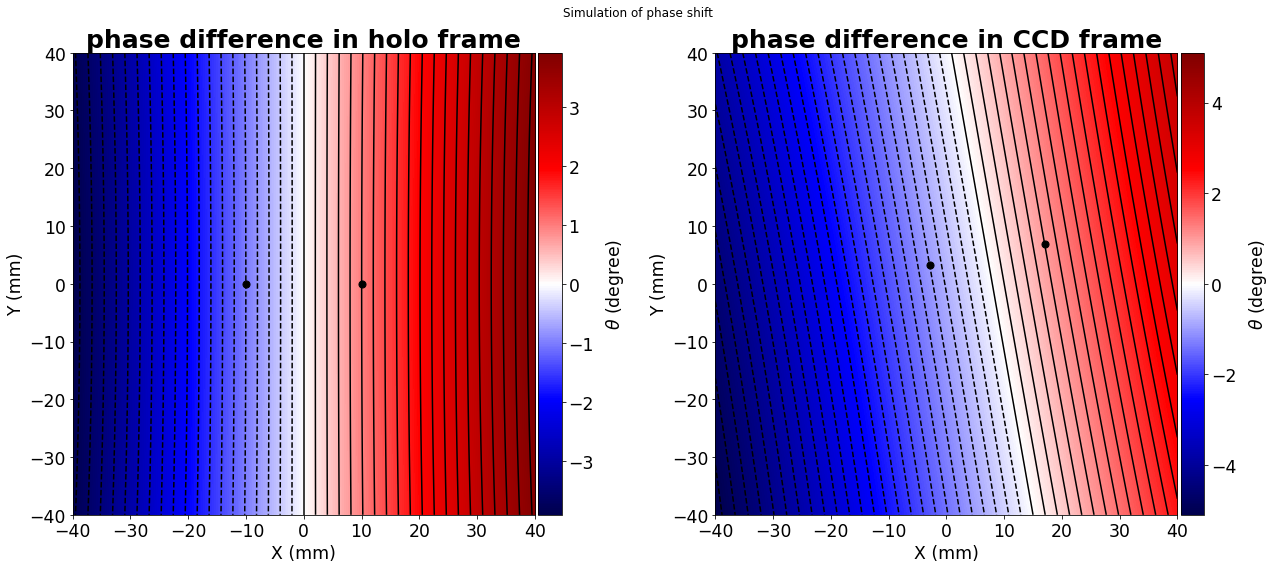

In [25]:
fig = plt.figure(figsize=(18,8))
ax1 = fig.add_subplot(121)

divider = make_axes_locatable(ax1)
cax1 = divider.append_axes('right', size='5%', pad=0.05)


im1=ax1.imshow(Z_Phi_holo,origin="lower",cmap="seismic",extent=(XMIN,XMAX,YMIN,YMAX))
h1 = ax1.contour(X,Y,Z_Phi_holo,levels=50,colors='k')
cbar1=fig.colorbar(im1,cax=cax1)

cbar1.ax.get_yaxis().labelpad = 10
cbar1.ax.set_ylabel('$\\theta$ (degree)', rotation=90)

xy1_A=np.array([-c_d1/2,0])
xy1_B=np.array([c_d1/2,0])

ax1.scatter(xy1_A[0],xy1_A[1],marker="o",color="k",s=50)
ax1.scatter(xy1_B[0],xy1_B[1],marker="o",color="k",s=50)

ax1.set_xlabel("X (mm)")
ax1.set_ylabel("Y (mm)")
ax1.set_title("phase difference in holo frame",fontweight="bold",fontsize=25)



ax2 = fig.add_subplot(122)

divider = make_axes_locatable(ax2)
cax2 = divider.append_axes('right', size='5%', pad=0.05)
maxPhi=np.max(np.abs(Z_Phi_ccd))

im2=ax2.imshow(Z_Phi_ccd,origin="lower",cmap="seismic",extent=(XMIN,XMAX,YMIN,YMAX),vmin=-maxPhi,vmax=maxPhi)
h2 = ax2.contour(X_ccd,Y_ccd,Z_Phi_ccd,levels=50,colors='k')
cbar2=fig.colorbar(im2,cax=cax2)

cbar2.ax.get_yaxis().labelpad = 10
cbar2.ax.set_ylabel('$\\theta$ (degree)', rotation=90)



xy_A = x1y1toxy(xy1_A,c_alpha0,c_x1_0,c_y1_0)
xy_B = x1y1toxy(xy1_B,c_alpha0,c_x1_0,c_y1_0)


XY_A = xytoXY(xy_A,c_Z1*zoom)
XY_B = xytoXY(xy_B,c_Z1*zoom)

ax2.scatter(XY_A[0],XY_A[1],marker="o",color="k",s=50)
ax2.scatter(XY_B[0],XY_B[1],marker="o",color="k",s=50)


ax2.set_xlabel("X (mm)")
ax2.set_ylabel("Y (mm)")
ax2.set_title("phase difference in CCD frame",fontweight="bold",fontsize=25)

plt.suptitle("Simulation of phase shift")
plt.tight_layout()

### Alpha angle

In [26]:
Z_Ang_holo=dd_alpha(XX,YY)

In [27]:
X_ccd = np.linspace(XMIN, XMAX, NPIX)
Y_ccd = np.linspace(YMIN, YMAX, NPIX)
XX_ccd, YY_ccd = np.meshgrid(X_ccd, Y_ccd, sparse=False)

# homothecy
zoom=1.5
xx_holo=XYtoxy(XX_ccd,c_Z1*zoom) 
yy_holo=XYtoxy(YY_ccd,c_Z1*zoom) 

# rotation
(xx1_holo,yy1_holo)=xytox1y1_2D(xx_holo,yy_holo,c_alpha0,c_x1_0,c_y1_0)
Z_Ang_ccd=dd_alpha(xx1_holo,yy1_holo)

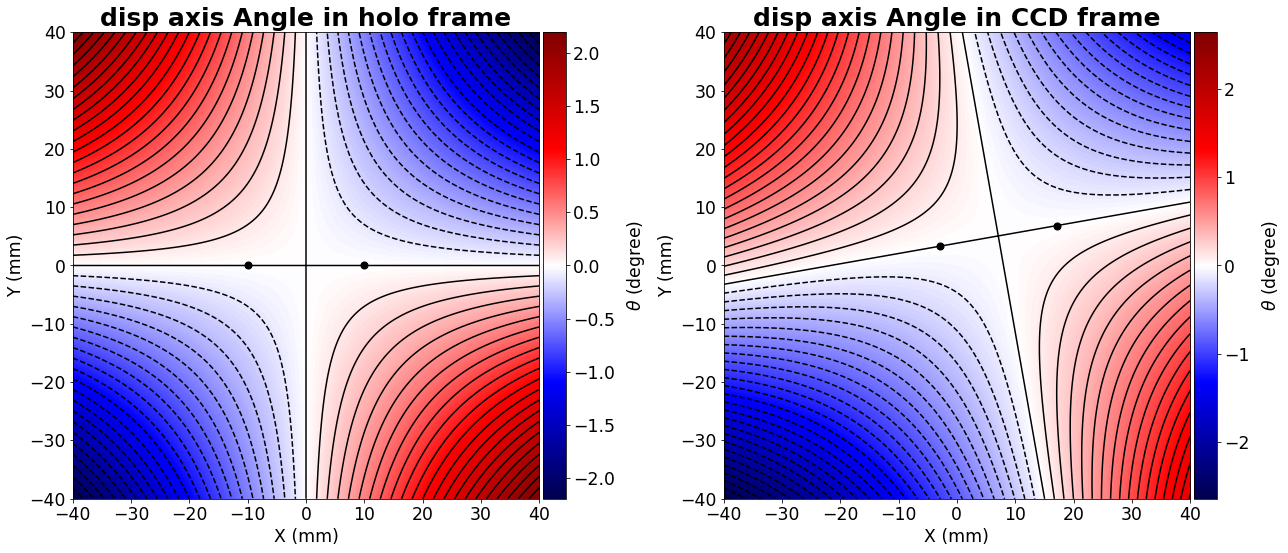

In [28]:
fig = plt.figure(figsize=(18,8))
ax1 = fig.add_subplot(121)

divider = make_axes_locatable(ax1)
cax1 = divider.append_axes('right', size='5%', pad=0.05)


im1=ax1.imshow(Z_Ang_holo,origin="lower",cmap="seismic",extent=(XMIN,XMAX,YMIN,YMAX))
h1 = ax1.contour(X,Y,Z_Ang_holo,levels=50,colors='k')
cbar1=fig.colorbar(im1,cax=cax1)

cbar1.ax.get_yaxis().labelpad = 10
cbar1.ax.set_ylabel('$\\theta$ (degree)', rotation=90)

xy1_A=np.array([-c_d1/2,0])
xy1_B=np.array([c_d1/2,0])

ax1.scatter(xy1_A[0],xy1_A[1],marker="o",color="k",s=50)
ax1.scatter(xy1_B[0],xy1_B[1],marker="o",color="k",s=50)

ax1.set_xlabel("X (mm)")
ax1.set_ylabel("Y (mm)")
ax1.set_title("disp axis Angle in holo frame",fontweight="bold",fontsize=25)


ax2 = fig.add_subplot(122)

divider = make_axes_locatable(ax2)
cax2 = divider.append_axes('right', size='5%', pad=0.05)

maxAng=np.max(np.abs(Z_Ang_ccd))
im2=ax2.imshow(Z_Ang_ccd,origin="lower",cmap="seismic",extent=(XMIN,XMAX,YMIN,YMAX),vmin=-maxAng,vmax=maxAng)
h2 = ax2.contour(X_ccd,Y_ccd,Z_Ang_ccd,levels=50,colors='k')
cbar2=fig.colorbar(im2,cax=cax2)

cbar2.ax.get_yaxis().labelpad = 10
cbar2.ax.set_ylabel('$\\theta$ (degree)', rotation=90)



xy_A = x1y1toxy(xy1_A,c_alpha0,c_x1_0,c_y1_0)
xy_B = x1y1toxy(xy1_B,c_alpha0,c_x1_0,c_y1_0)


XY_A = xytoXY(xy_A,c_Z1*zoom)
XY_B = xytoXY(xy_B,c_Z1*zoom)

ax2.scatter(XY_A[0],XY_A[1],marker="o",color="k",s=50)
ax2.scatter(XY_B[0],XY_B[1],marker="o",color="k",s=50)


ax2.set_xlabel("X (mm)")
ax2.set_ylabel("Y (mm)")
ax2.set_title("disp axis Angle in CCD frame",fontweight="bold",fontsize=25)


plt.tight_layout()

# Estimation of hologram parameters

## Random points

In [29]:
NumberofPoints=50
Nxsim=np.random.randint(NPIX, size=(NumberofPoints))
Nysim=np.random.randint(NPIX, size=(NumberofPoints))
Xsim=X_ccd[Nxsim]
Ysim=Y_ccd[Nysim]

## Simulated Measurement

In [30]:
sig_alpha=0.01 # measurement error on angle in degree

In [31]:
# group the data points
XYsim=np.array(list(zip(Xsim,Ysim)))

In [32]:
# convert coordinates in hologram frame (same orientation as CCD)
xysim=XYtoxy(XYsim,c_Z1*zoom)

In [33]:
# apply true rotation to have coordinates in intrisic hologram frame
x1y1sim=np.zeros(xysim.shape)
for idx in np.arange(NumberofPoints):
    x1y1sim[idx,:]=xytox1y1(xysim[idx],c_alpha0,c_x1_0,c_y1_0)

In [34]:
# calculate d_alpha for the data (in intrinsic hologram ref frame) in degree
d_alpha=dd_alpha(x1y1sim[:,0],x1y1sim[:,1])

In [35]:
# simulate measurement of angle in CCD frame
Zsim=c_alpha0+d_alpha+np.random.normal(loc=0,scale=sig_alpha)

## Plot simulated points

Text(0.5, 1.0, 'Simulation in CCD frame')

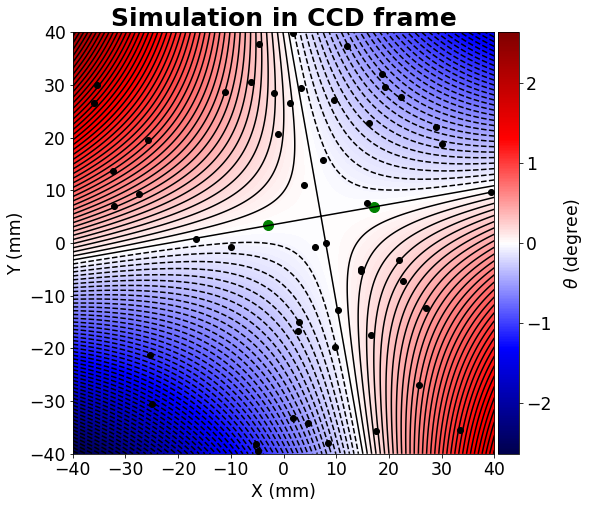

In [36]:
fig = plt.figure(figsize=(8,8))

ax2 = fig.add_subplot(111)

divider = make_axes_locatable(ax2)
cax2 = divider.append_axes('right', size='5%', pad=0.05)

maxAng=np.max(np.abs(Z_Ang_ccd))
im2=ax2.imshow(Z_Ang_ccd,origin="lower",cmap="seismic",extent=(XMIN,XMAX,YMIN,YMAX),vmin=-maxAng,vmax=maxAng)
h2 = ax2.contour(X_ccd,Y_ccd,Z_Ang_ccd,levels=100,colors='k')
cbar2=fig.colorbar(im2,cax=cax2)

cbar2.ax.get_yaxis().labelpad = 10
cbar2.ax.set_ylabel('$\\theta$ (degree)', rotation=90)

xy1_A=np.array([-c_d1/2,0])
xy1_B=np.array([c_d1/2,0])

xy_A = x1y1toxy(xy1_A,c_alpha0,c_x1_0,c_y1_0)
xy_B = x1y1toxy(xy1_B,c_alpha0,c_x1_0,c_y1_0)

XY_A = xytoXY(xy_A,c_Z1*zoom)
XY_B = xytoXY(xy_B,c_Z1*zoom)

ax2.scatter(XY_A[0],XY_A[1],marker="o",color="g",s=100)
ax2.scatter(XY_B[0],XY_B[1],marker="o",color="g",s=100)

ax2.scatter(X[Nxsim],Y[Nysim],marker="o",color="k")

ax2.set_xlabel("X (mm)")
ax2.set_ylabel("Y (mm)")
ax2.set_title("Simulation in CCD frame",fontweight="bold",fontsize=25)



# Chi2 function

In [37]:
def chi2(Xdata,Ydata,Zdata,X0,Y0,alpha,Z,sig=0.05,Npar=2):
    """
    Chi2 per degree of freedom
    
    - input parameters
      - Xdata,Ydata,Zdata :three 1D-numpy array: Xdata,Ydata coordinates of order zero, Zdata angle measured
      - X0,Y0 2 2D numpy arrays of unknown parameters to fit (optical center of hologram in CCD frame)
      - alpha,Z other parameters
      - sig : experimental error on angle
      - Npar : number of parameter to use in degrees of freedom
      
    - ouput
     - 2D numpy array of chi2 representing the chi2
     
    """
    
   
    N=len(Xdata)
    chi2=np.zeros(X0.shape)
 
    # loop on data
    for idx in np.arange(N):
        
        X=Xdata[idx] # scalar
        Y=Ydata[idx]
        
        XY=np.array([X,Y])
        
        # homothecie according the Z assumption
        xy=XYtoxy(XY,Z)
    
        # rotation according the alpha assumption
        x1y1=xytox1y1(xy,alpha,X0,Y0)
        
        d_alpha=dd_alpha(x1y1[0],x1y1[1])
        
        # angle in the model
        angle_mod=alpha+d_alpha
        
        #angle measured
        angle_mes=Zdata[idx]
    
        chi2+=(angle_mod-angle_mes)**2/sig**2
        
    return chi2/(N-Npar) 

Text(0.5, 1.0, 'distrib of holo angle')

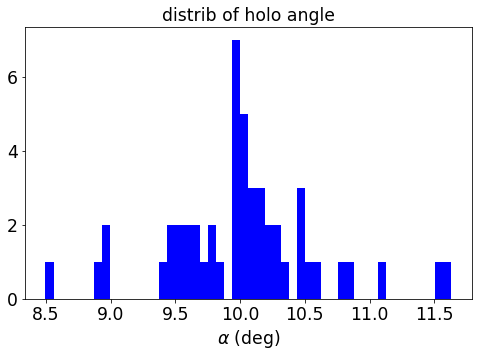

In [38]:
fig = plt.figure(figsize=(8,5))
ax=fig.add_subplot(111)
ax.hist(Zsim,bins=50,facecolor="b");
ax.set_xlabel("$\\alpha$ (deg)")
ax.set_title("distrib of holo angle")

## Calculation of chi2

In [39]:
the_chi2=chi2(Xsim,Ysim,Zsim,XX_ccd,YY_ccd,c_alpha0,c_Z1*zoom,sig=sig_alpha,Npar=2)

## Plot

In [40]:
import matplotlib.ticker                         # here's where the formatter is
cbformat = matplotlib.ticker.ScalarFormatter()   # create the formatter
cbformat.set_powerlimits((-1,1)) 

[561] [587]
7.0070070070070045 4.924924924924923


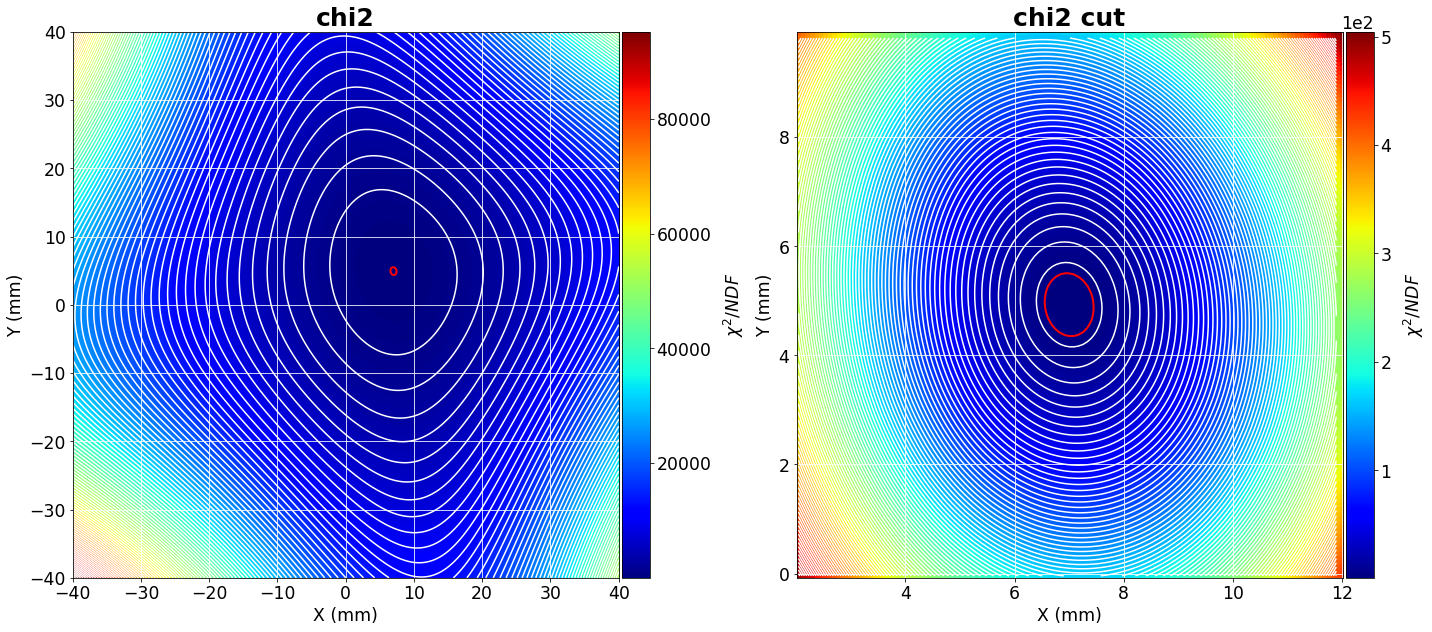

In [41]:
fig = plt.figure(figsize=(20,10))


ax1 = fig.add_subplot(121)
divider = make_axes_locatable(ax1)
cax1 = divider.append_axes('right', size='5%', pad=0.05)
im1=ax1.imshow(the_chi2,origin="lower",cmap="jet",extent=(XMIN,XMAX,YMIN,YMAX))
h1 = ax1.contour(X_ccd,Y_ccd,the_chi2,levels=100,colors='w')
h1b = ax1.contour(X_ccd,Y_ccd,the_chi2,levels=[2.30+the_chi2.min()],colors='r',linewidths=2)
cbar1=fig.colorbar(im1,cax=cax1,format=cbformat)
cbar1.ax.get_yaxis().labelpad = 10
cbar1.ax.set_ylabel('$\\chi^2/NDF$', rotation=90)
ax1.set_xlabel("X (mm)")
ax1.set_ylabel("Y (mm)")
ax1.set_title("chi2",fontweight="bold",fontsize=25)
ax1.grid(color="w")

the_chi2min=the_chi2.min()

idx_y_chi2min,idx_x_chi2min=np.where(the_chi2==the_chi2min)
print(idx_y_chi2min,idx_x_chi2min)
x_chi2min=X_ccd[idx_x_chi2min][0]
y_chi2min=Y_ccd[idx_y_chi2min][0]
print(x_chi2min,y_chi2min)

ax2 = fig.add_subplot(122)
xmin=x_chi2min-5
xmax=x_chi2min+5
ymin=y_chi2min-5
ymax=y_chi2min+5

ibinx=np.where(np.logical_and(X_ccd>=xmin,X_ccd<=xmax))[0]
ibiny=np.where(np.logical_and(Y_ccd>=ymin,X_ccd<=ymax))[0]
chi2_cut=the_chi2[ibiny.min():ibiny.max(), ibinx.min():ibinx.max()]
X_cut=X[ibinx.min():ibinx.max()]
Y_cut=X[ibiny.min():ibiny.max()]


divider = make_axes_locatable(ax2)
cax2 = divider.append_axes('right', size='5%', pad=0.05)
im2=ax2.imshow(chi2_cut,origin="lower",cmap="jet",extent=(xmin,xmax,ymin,ymax))
h2 = ax2.contour(X_cut,Y_cut,chi2_cut,levels=100,colors='w')
h2b = ax2.contour(X_cut,Y_cut,chi2_cut,levels=[2.30+chi2_cut.min()],colors='r',linewidths=2)
cbar2=fig.colorbar(im2,cax=cax2,format=cbformat)
cbar2.ax.get_yaxis().labelpad = 10
cbar2.ax.set_ylabel('$\\chi^2/NDF$', rotation=90)
#cbformat = matplotlib.ticker.ScalarFormatter()   # create the formatter
#cbformat.set_powerlimits((-2,4))   
ax2.set_xlabel("X (mm)")
ax2.set_ylabel("Y (mm)")
ax2.set_title("chi2 cut",fontweight="bold",fontsize=25)
ax2.grid(color="w")

plt.tight_layout()
plt.show()

# Parameter Grid

In [42]:
plt.rcParams["axes.labelsize"] = 'large'
plt.rcParams['axes.titlesize'] = 'large'
plt.rcParams['xtick.labelsize']= 'large'
plt.rcParams['ytick.labelsize']= 'large'

In [43]:
Ncol=4
Nrow=4
Nalpha=Nrow*Ncol
alpha_range=5
alpha_min=c_alpha0-alpha_range
alpha_max=c_alpha0+alpha_range
alpha_step=(alpha_max-alpha_min)/Nalpha
alpha_values=np.linspace(alpha_min,alpha_max,Nalpha)

<ipython-input-44-5ad844d0420d>:25: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.suptitle("Simulation : hologram parameter search",Y=1)


Text(0.5, 1, 'Simulation : hologram parameter search')

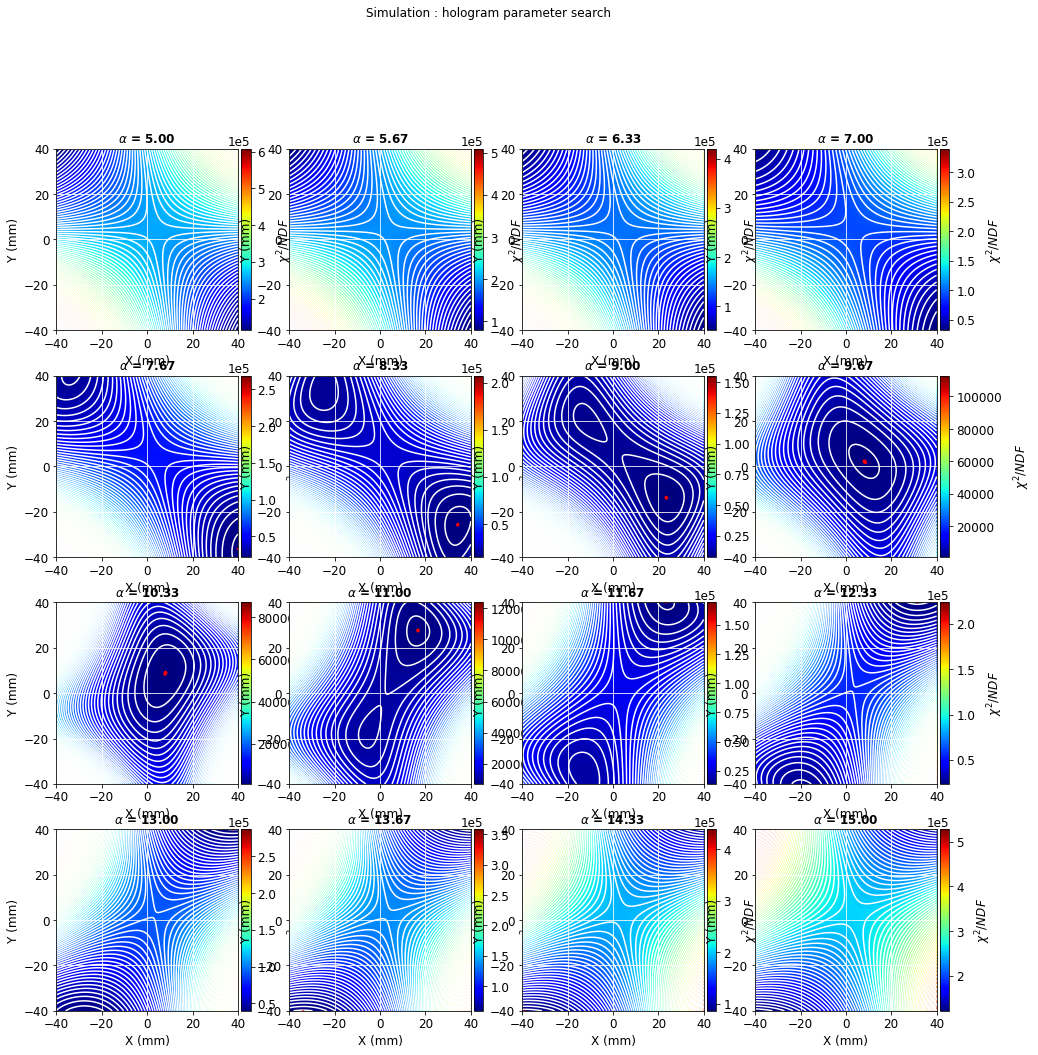

In [44]:
fig = plt.figure(figsize=(16,16))
the_chi2min=np.zeros(Nalpha)
the_locchi2min = []
# loop on angle
for idx in np.arange(Nalpha):
    ax1=fig.add_subplot(Nrow,Ncol,idx+1)
    the_chi2=chi2(Xsim,Ysim,Zsim,XX_ccd,YY_ccd,alpha_values[idx],c_Z1*zoom,sig=sig_alpha,Npar=2)
    the_chi2min[idx]=the_chi2.min()  # value of chi2min
    the_locchi2min.append(np.where(the_chi2==the_chi2.min())) # location of chi2min 
    
    divider = make_axes_locatable(ax1)
    cax1 = divider.append_axes('right', size='5%', pad=0.05)
    im1=ax1.imshow(the_chi2,origin="lower",cmap="jet",extent=(XMIN,XMAX,YMIN,YMAX))
    h1 = ax1.contour(X_ccd,Y_ccd,the_chi2,levels=100,colors='w')
    h1b = ax1.contour(X_ccd,Y_ccd,the_chi2,levels=[2.30+the_chi2.min()],colors='r',linewidths=2)
    cbar1=fig.colorbar(im1,cax=cax1,format=cbformat)
    cbar1.ax.get_yaxis().labelpad = 10
    cbar1.ax.set_ylabel('$\\chi^2/NDF$', rotation=90)
    ax1.set_xlabel("X (mm)")
    ax1.set_ylabel("Y (mm)")
    title="$\\alpha$ = {:3.2f}".format(alpha_values[idx])
    ax1.set_title(title,fontweight="bold")
    ax1.grid(color="w")
    
plt.suptitle("Simulation : hologram parameter search",Y=1)
#plt.tight_layout()


In [45]:
plt.rcParams["axes.labelsize"] = 'xx-large'
plt.rcParams['axes.titlesize'] = 'xx-large'
plt.rcParams['xtick.labelsize']= 'xx-large'
plt.rcParams['ytick.labelsize']= 'xx-large'

Text(0.5, 1.0, '$simulation : \\chi^2$ vs holo angle $\\alpha$')

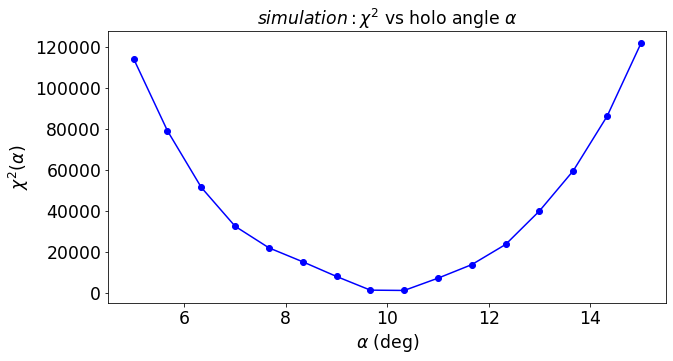

In [46]:
fig = plt.figure(figsize=(10,5))
ax=fig.add_subplot(111)
ax.plot(alpha_values,the_chi2min,'bo-')
ax.set_xlabel("$\\alpha$ (deg)")
ax.set_ylabel("$\\chi^2(\\alpha)$")
ax.set_title("$simulation : \chi^2$ vs holo angle $\\alpha$")

### Find where we have the chi2 min

In [47]:
idx_min=np.where(the_chi2min==the_chi2min.min())[0][0]
idx_min

8

In [48]:
found_angle_1=alpha_values[idx_min]
found_angle_1

10.333333333333332

In [49]:
idx_chi2min_y,idx_chi2min_x=the_locchi2min[idx_min]

In [50]:
X_ccd[idx_chi2min_x][0]

8.048048048048045

In [51]:
Y_ccd[idx_chi2min_y][0]

8.848848848848846

# With AuxTel data

In [52]:
from IPython.display import Image
#Image(filename='figures/amas_ouvert.png') 

In [53]:
#Image(filename='figures/AmasOuvert_holophilines.png')

## read excel file

In [54]:
filedata="../data/orientations/orientations-holo_auxtel.xlsx"

In [55]:
df=pd.read_excel(filedata,index_col=None,header=17)

In [56]:
df.head()

AuxTel  Unnamed: 1  Unnamed: 2  Unnamed: 3  Unnamed: 4  Unnamed: 5  \
0     NaN           1         279        1528         303        3938   
1     NaN           2        1540         652        1559        3985   
2     NaN           3        2536          31        2543        3987   
3     NaN           4        3184          21        3187        3987   
4     NaN           5        3349          28        3356        3976   

   Unnamed: 6  Unnamed: 7   Xhp   Yhp   Xhq   Yhq   Xhc   Yhc  Unnamed: 14  \
0         218        1824  1528  3817  3938  3793  1824  3878         2410   
1        1348         761   652  2556  3985  2537   761  2748         3333   
2        2219        2285    31  1560  3987  1553  2285  1877         3956   
3        2800        1271    21   912  3987   909  1271  1296         3966   
4        2965        1422    28   747  3976   740  1422  1131         3948   

   Unnamed: 15     alpha  X (mm)  Y(mm)     degré  
0          -24 -0.009958  -18.30  -2.24 -0.570562  
1          -19 -0.005701   -7.00 -12.87 -0.326615  
2           -7 -0.001769    1.71   2.37 -0.101383  
3           -3 -0.000756    7.52  -7.77 -0.043340  
4           -7 -0.001773    9.17  -6.26 -0.101588

### Show columns

In [57]:
df.columns

Index(['AuxTel', 'Unnamed: 1', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4',
       'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Xhp', 'Yhp', 'Xhq', 'Yhq',
       'Xhc', 'Yhc', 'Unnamed: 14', 'Unnamed: 15', 'alpha', 'X (mm)', 'Y(mm)',
       'degré'],
      dtype='object')

### Extract good columns

In [58]:
df=df[['X (mm)', 'Y(mm)','degré']]

In [59]:
df.columns

Index(['X (mm)', 'Y(mm)', 'degré'], dtype='object')

### Describe

In [60]:
df.describe()

X (mm)      Y(mm)      degré
count  24.000000  24.000000  24.000000
mean   -0.829583  -3.511667  -0.222575
std    12.321694   8.733710   0.251806
min   -19.710000 -15.630000  -0.748402
25%   -12.282500  -9.165000  -0.322820
50%     2.240000  -5.495000  -0.212774
75%     9.485000   2.430000  -0.054208
max    17.940000  12.820000   0.218231

## Extract data

In [61]:
NumberofPointsData=len(df)

Xdata=df["X (mm)"].values
Ydata=df["Y(mm)"].values
alphadata=df["degré"].values

Text(0.5, 0, '$\\alpha$ (deg)')

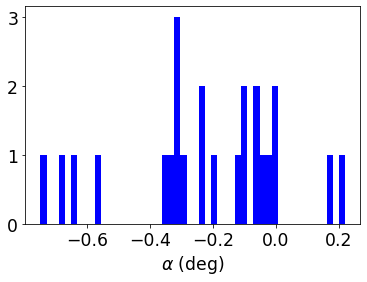

In [62]:
fig=plt.figure(figsize=(6,4))
ax=fig.add_subplot(111)
ax.hist(alphadata,bins=50,facecolor="b");
ax.set_xlabel('$\\alpha$ (deg)')

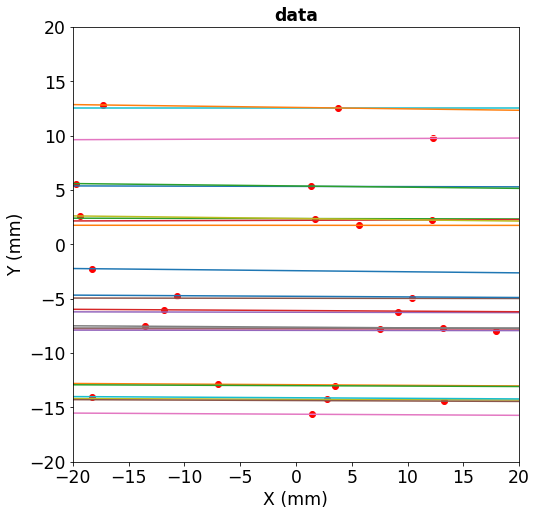

In [63]:
fig=plt.figure(figsize=(8,8))
ax=fig.add_subplot(111)
for idx in np.arange(NumberofPointsData):
    x_i=Xdata[idx]
    y_i=Ydata[idx]
    slope=np.tan(alphadata[idx]*u_degtorad)
    ax.scatter(x_i,y_i,marker="o",color="r")
    x_1=-20
    x_2=20
    y_1=(x_1-x_i)*slope+y_i
    y_2=(x_2-x_i)*slope+y_i
    ax.plot([x_1,x_2],[y_1,y_2])
    
ax.set_xlim(-20,20)
ax.set_ylim(-20,20)

ax.set_xlabel("X (mm)")
ax.set_ylabel("Y (mm)")
title="data"
ax.set_title(title,fontweight="bold")
ax.grid(color="w")
     

## Dump

In [64]:
d_alpha_model=np.zeros(NumberofPointsData)
theX0=7.5
theY0=0.
thealpha=0
for idx in np.arange(NumberofPointsData):
    
        
    
        XY=np.array([Xdata[idx],Ydata[idx]])
        
        # homothecie according the Z assumption
        xy=XYtoxy(XY,c_Z0)
    
        # rotation according the alpha assumption
        x1y1=xytox1y1(xy,thealpha,theX0,theY0)
        
        thed_alpha=dd_alpha(x1y1[0],x1y1[1])
        d_alpha_model[idx]=thed_alpha

In [65]:
df2=pd.DataFrame()
df2["x"]=Xdata
df2["y"]=Ydata
df2["alpha"]=alphadata
df2["dalpha"]=d_alpha_model

In [66]:
df2

x      y     alpha    dalpha
0  -18.30  -2.24 -0.570562 -0.081266
1   -7.00 -12.87 -0.326615 -0.261930
2    1.71   2.37 -0.101383  0.019476
3    7.52  -7.77 -0.043340 -0.000545
4    9.17  -6.26 -0.101588  0.014033
5   10.43  -4.97 -0.057831  0.019923
6   12.26   9.75  0.218231 -0.063982
7   13.16  -7.67  0.000000  0.060045
8    2.77 -14.26 -0.197798 -0.095524
9    3.73  12.56  0.000000  0.067384
10   1.31   5.33 -0.121550  0.046763
11   5.63   1.75 -0.014944  0.004761
12   3.50 -13.01 -0.227751 -0.073958
13  12.18   2.25  0.169971 -0.014545
14  17.94  -7.93 -0.063124  0.115154
15  13.27 -14.42 -0.235645  0.114690
16   1.48 -15.63 -0.294241 -0.132706
17 -13.55  -7.53 -0.359718 -0.222739
18 -19.32   2.61 -0.684314  0.098419
19 -18.28 -14.01 -0.308394 -0.505502
20 -10.64  -4.72 -0.314480 -0.120482
21 -17.31  12.82 -0.748402  0.445556
22 -19.71   5.59 -0.636759  0.213718
23 -11.86  -6.02 -0.321555 -0.163905

## Keep first hypothesis on rotation angle from data

- keep the average angle

In [67]:
assummed_angle_0=df.mean()["degré"]
assummed_angle_0

-0.22257473963997665

## Parameter grid for parameter search

In [68]:
plt.rcParams["axes.labelsize"] = 'large'
plt.rcParams['axes.titlesize'] = 'large'
plt.rcParams['xtick.labelsize']= 'large'
plt.rcParams['ytick.labelsize']= 'large'

### Step 1

#### prior region on angle search

In [69]:
Ncol=5
Nrow=5
Nalpha=Nrow*Ncol
alpha_range=10
alpha_min=assummed_angle_0-alpha_range
alpha_max=assummed_angle_0+alpha_range
alpha_step=(alpha_max-alpha_min)/Nalpha
alpha_values=np.linspace(alpha_min,alpha_max,Nalpha)
zoom=1

#### Plot the grid for minimum seach

<ipython-input-70-ec15e669e6a6>:25: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.suptitle("AuxTel Data : hologram parameters search, step 1",Y=1,fontsize=15)


Text(0.5, 1, 'AuxTel Data : hologram parameters search, step 1')

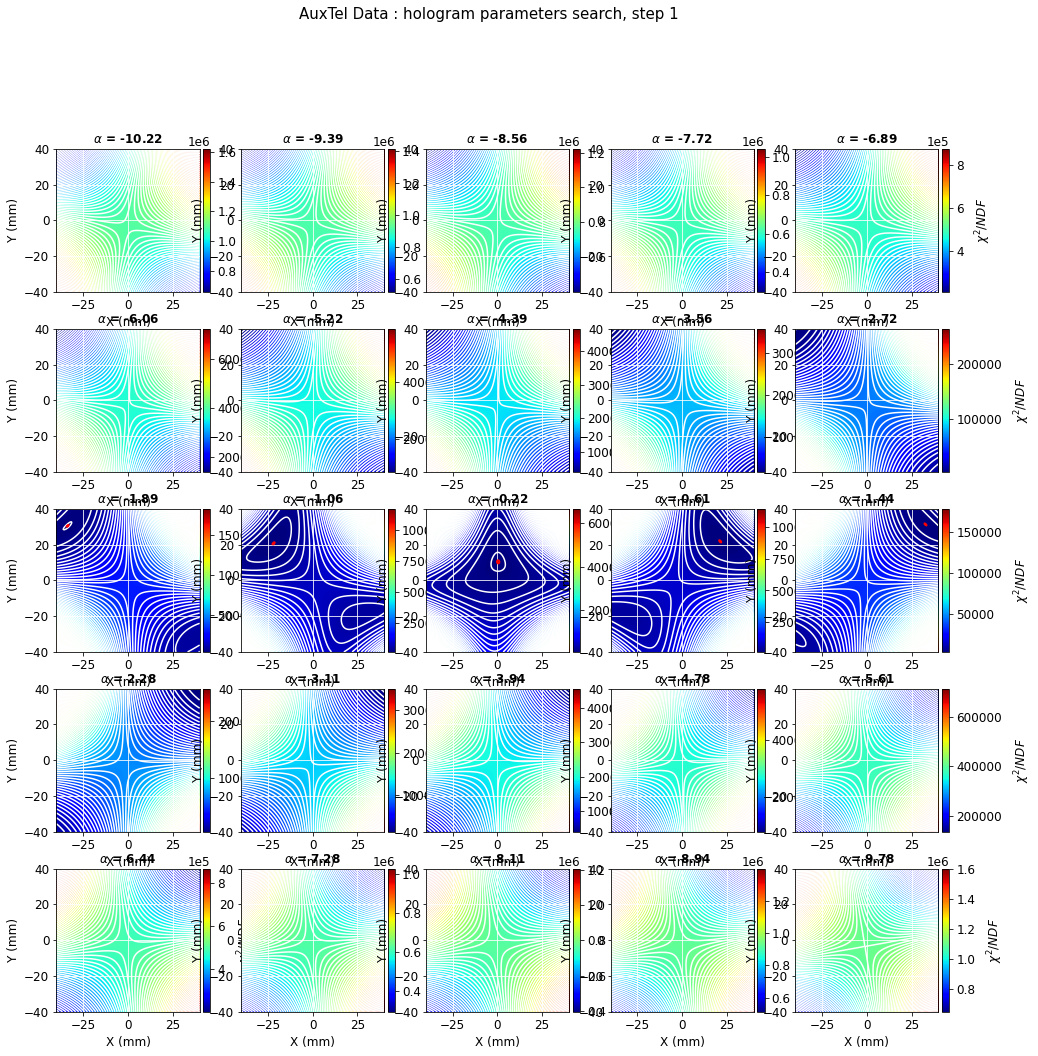

In [70]:
fig = plt.figure(figsize=(16,16))
the_chi2min=np.zeros(Nalpha) # minimum value
the_locchi2min=[] # location of minimum
# loop on angle
for idx in np.arange(Nalpha):
    ax1=fig.add_subplot(Nrow,Ncol,idx+1)
    the_chi2=chi2(Xdata,Ydata,alphadata,XX_ccd,YY_ccd,alpha_values[idx],c_Z1*zoom,sig=sig_alpha,Npar=2)
    the_chi2min[idx]=the_chi2.min()    # the minimum of chi2
    the_locchi2min.append(np.where(the_chi2==the_chi2.min())) # location of chi2min 
    
    divider = make_axes_locatable(ax1)
    cax1 = divider.append_axes('right', size='5%', pad=0.05)
    im1=ax1.imshow(the_chi2,origin="lower",cmap="jet",extent=(XMIN,XMAX,YMIN,YMAX))
    h1 = ax1.contour(X_ccd,Y_ccd,the_chi2,levels=100,colors='w')
    h1b = ax1.contour(X_ccd,Y_ccd,the_chi2,levels=[2.30+the_chi2.min()],colors='r',linewidths=2)
    cbar1=fig.colorbar(im1,cax=cax1,format=cbformat)
    cbar1.ax.get_yaxis().labelpad = 10
    cbar1.ax.set_ylabel('$\\chi^2/NDF$', rotation=90)
    ax1.set_xlabel("X (mm)")
    ax1.set_ylabel("Y (mm)")
    title="$\\alpha$ = {:3.2f}".format(alpha_values[idx])
    ax1.set_title(title,fontweight="bold")
    ax1.grid(color="w")
    
plt.suptitle("AuxTel Data : hologram parameters search, step 1",Y=1,fontsize=15)
    
#plt.tight_layout()


In [71]:
plt.rcParams["axes.labelsize"] = 'xx-large'
plt.rcParams['axes.titlesize'] = 'xx-large'
plt.rcParams['xtick.labelsize']= 'xx-large'
plt.rcParams['ytick.labelsize']= 'xx-large'

Text(0.5, 1.0, 'Auxtel data, step 1 : $\\chi^2$ vs holo angle $\\alpha$')

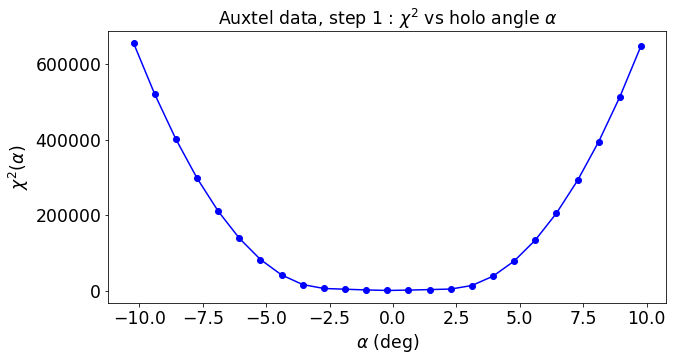

In [72]:
fig = plt.figure(figsize=(10,5))
ax=fig.add_subplot(111)
ax.plot(alpha_values,the_chi2min,'bo-')
ax.set_xlabel("$\\alpha$ (deg)")
ax.set_ylabel("$\\chi^2(\\alpha)$")
ax.set_title("Auxtel data, step 1 : $\chi^2$ vs holo angle $\\alpha$")

In [73]:
idx_min=np.where(the_chi2min==the_chi2min.min())[0][0]

In [74]:
found_angle_1=alpha_values[idx_min]
found_angle_1

-0.22257473963997754

In [75]:
idx_chi2min_y,idx_chi2min_x=the_locchi2min[idx_min]

In [76]:
X0_found_1=X_ccd[idx_chi2min_x][0]
X0_found_1

0.36036036036036023

In [77]:
Y0_found_1=Y_ccd[idx_chi2min_y][0]
Y0_found_1

10.290290290290287

In [78]:
the_chi2=chi2(Xdata,Ydata,alphadata,XX_ccd,YY_ccd,found_angle_1,c_Z1*zoom,sig=sig_alpha,Npar=2)

#### Plot the result of step 1

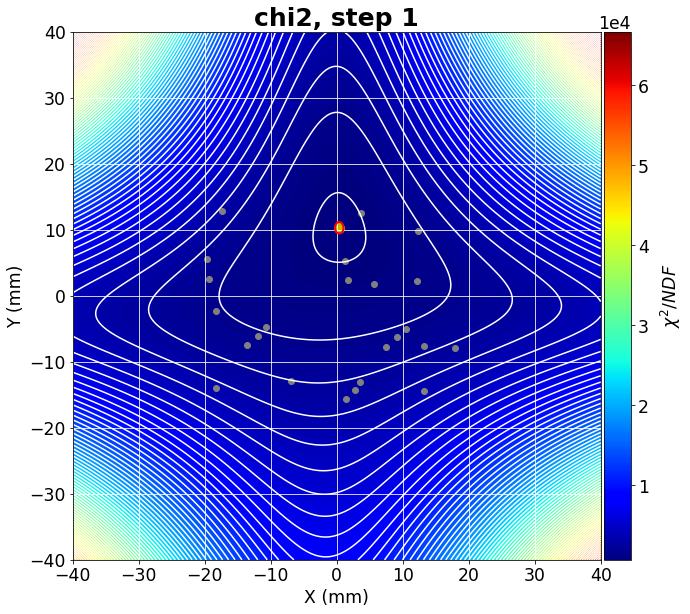

In [79]:
fig = plt.figure(figsize=(10,10))


ax1 = fig.add_subplot(111)
divider = make_axes_locatable(ax1)
cax1 = divider.append_axes('right', size='5%', pad=0.05)
im1=ax1.imshow(the_chi2,origin="lower",cmap="jet",extent=(XMIN,XMAX,YMIN,YMAX))
h1 = ax1.contour(X_ccd,Y_ccd,the_chi2,levels=100,colors='w')
h1b = ax1.contour(X_ccd,Y_ccd,the_chi2,levels=[2.30+the_chi2.min()],colors='r',linewidths=2)
cbar1=fig.colorbar(im1,cax=cax1,format=cbformat)
cbar1.ax.get_yaxis().labelpad = 10
cbar1.ax.set_ylabel('$\\chi^2/NDF$', rotation=90)
ax1.set_xlabel("X (mm)")
ax1.set_ylabel("Y (mm)")
ax1.set_title("chi2, step 1",fontweight="bold",fontsize=25)
ax1.grid(color="w")


#xy1_A=np.array([X0_found_1-c_d1/2,Y0_found_1])
#xy1_B=np.array([X0_found_1+c_d1/2,Y0_found_1])

#xy_A = x1y1toxy(xy1_A,c_alpha0)
#xy_B = x1y1toxy(xy1_B,c_alpha0)

#XY_A = xytoXY(xy_A,c_Z1*zoom)
#XY_B = xytoXY(xy_B,c_Z1*zoom)

ax1.scatter(X0_found_1,Y0_found_1,marker="o",color="y",s=100)
#ax1.scatter(XY_A[0],XY_A[1],marker="o",color="g",s=100)
#ax1.scatter(XY_B[0],XY_B[1],marker="o",color="g",s=100)

ax1.scatter(Xdata,Ydata,marker="o",color="gray")


In [80]:
#Image(filename='figures/amas_ouvert.png') 

### Step 2

In [81]:
plt.rcParams["axes.labelsize"] = 'large'
plt.rcParams['axes.titlesize'] = 'large'
plt.rcParams['xtick.labelsize']= 'large'
plt.rcParams['ytick.labelsize']= 'large'

In [82]:
Ncol=5
Nrow=5
Nalpha=Nrow*Ncol
alpha_range=1
alpha_min=found_angle_1-alpha_range
alpha_max=found_angle_1+alpha_range
alpha_step=(alpha_max-alpha_min)/Nalpha
alpha_values=np.linspace(alpha_min,alpha_max,Nalpha)
zoom=1

<ipython-input-83-f101a4e1fafe>:26: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.suptitle("Auxtel Data : hologram parameters search, step 2",Y=1)


Text(0.5, 1, 'Auxtel Data : hologram parameters search, step 2')

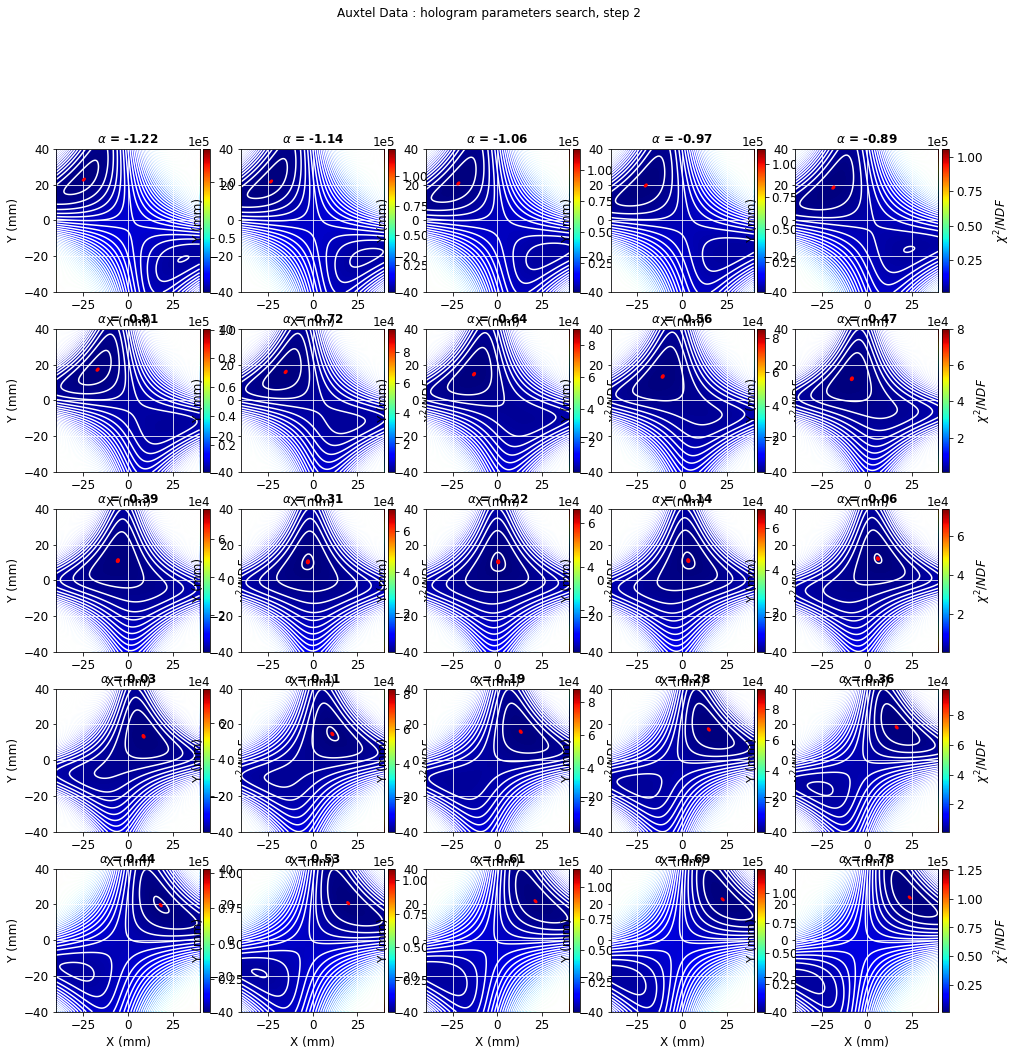

In [83]:
fig = plt.figure(figsize=(16,16))
the_chi2min=np.zeros(Nalpha)
the_locchi2min=[]

# loop on angle
for idx in np.arange(Nalpha):
    ax1=fig.add_subplot(Nrow,Ncol,idx+1)
    the_chi2=chi2(Xdata,Ydata,alphadata,XX_ccd,YY_ccd,alpha_values[idx],c_Z1*zoom,sig=sig_alpha,Npar=2)
    the_chi2min[idx]=the_chi2.min()
    the_locchi2min.append(np.where(the_chi2==the_chi2.min())) # location of chi2min 
    
    divider = make_axes_locatable(ax1)
    cax1 = divider.append_axes('right', size='5%', pad=0.05)
    im1=ax1.imshow(the_chi2,origin="lower",cmap="jet",extent=(XMIN,XMAX,YMIN,YMAX))
    h1 = ax1.contour(X_ccd,Y_ccd,the_chi2,levels=100,colors='w')
    h1b = ax1.contour(X_ccd,Y_ccd,the_chi2,levels=[2.30+the_chi2.min()],colors='r',linewidths=2)
    cbar1=fig.colorbar(im1,cax=cax1,format=cbformat)
    cbar1.ax.get_yaxis().labelpad = 10
    cbar1.ax.set_ylabel('$\\chi^2/NDF$', rotation=90)
    ax1.set_xlabel("X (mm)")
    ax1.set_ylabel("Y (mm)")
    title="$\\alpha$ = {:3.2f}".format(alpha_values[idx])
    ax1.set_title(title,fontweight="bold")
    ax1.grid(color="w")
    
plt.suptitle("Auxtel Data : hologram parameters search, step 2",Y=1)
#plt.tight_layout()


In [84]:
plt.rcParams["axes.labelsize"] = 'xx-large'
plt.rcParams['axes.titlesize'] = 'xx-large'
plt.rcParams['xtick.labelsize']= 'xx-large'
plt.rcParams['ytick.labelsize']= 'xx-large'

Text(0.5, 1.0, 'Auxtel data  step 2 : $\\chi^2$ vs holo angle $\\alpha$')

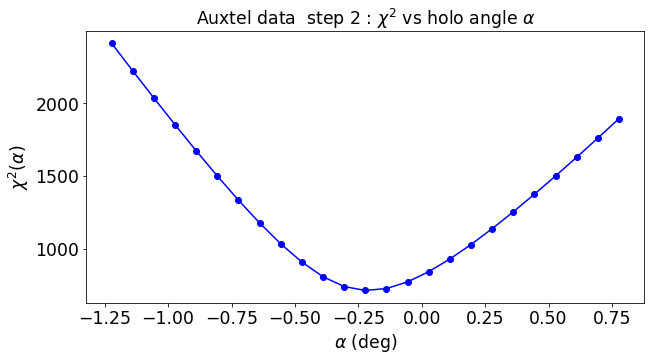

In [85]:
fig = plt.figure(figsize=(10,5))
ax=fig.add_subplot(111)
ax.plot(alpha_values,the_chi2min,'bo-')
ax.set_xlabel("$\\alpha$ (deg)")
ax.set_ylabel("$\\chi^2(\\alpha)$")
ax.set_title("Auxtel data  step 2 : $\chi^2$ vs holo angle $\\alpha$")

In [86]:
idx_min=np.where(the_chi2min==the_chi2min.min())[0][0]

In [87]:
assummed_angle_2=alpha_values[idx_min]
assummed_angle_2

-0.22257473963997754

In [88]:
idx_chi2min_y,idx_chi2min_x=the_locchi2min[idx_min]

In [89]:
X0_found_2=X_ccd[idx_chi2min_x][0]
X0_found_2

0.36036036036036023

In [90]:
Y0_found_2=Y_ccd[idx_chi2min_y][0]
Y0_found_2

10.290290290290287

In [91]:
# homothecy
zoom=1.
xx_holo=XYtoxy(XX_ccd,c_Z1*zoom) 
yy_holo=XYtoxy(YY_ccd,c_Z1*zoom) 

# rotation
(xx1_holo,yy1_holo)=xytox1y1_2D(xx_holo,yy_holo,assummed_angle_2,X0_found_2,Y0_found_2)
Z_Phi_ccd_2=dd_phi(xx1_holo,yy1_holo)

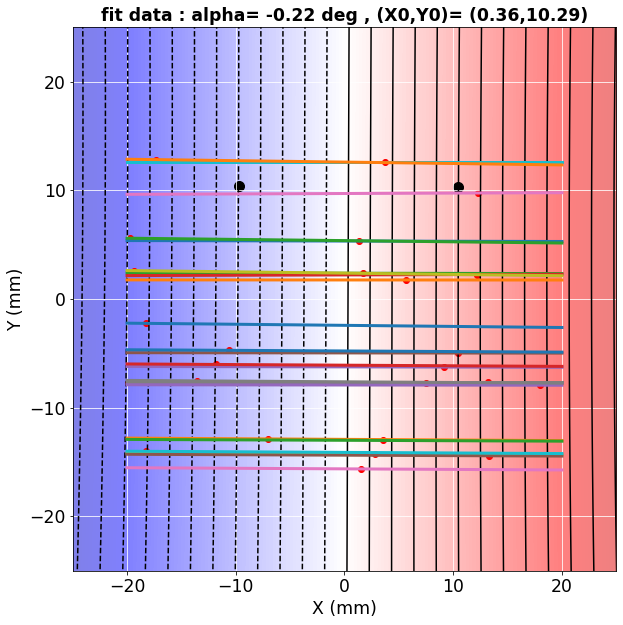

In [92]:
fig=plt.figure(figsize=(10,10))
ax=fig.add_subplot(111)
for idx in np.arange(NumberofPointsData):
    x_i=Xdata[idx]
    y_i=Ydata[idx]
    slope=np.tan(alphadata[idx]*u_degtorad)
    ax.scatter(x_i,y_i,marker="o",color="r")
    x_1=-20
    x_2=20
    y_1=(x_1-x_i)*slope+y_i
    y_2=(x_2-x_i)*slope+y_i
    ax.plot([x_1,x_2],[y_1,y_2],lw=3)
    
    
im=ax.imshow(Z_Phi_ccd_2,origin="lower",cmap="seismic",extent=(XMIN,XMAX,YMIN,YMAX),alpha=0.5)
h = ax.contour(X_ccd,Y_ccd,Z_Phi_ccd_2,levels=50,colors='k')

xy_A = x1y1toxy(xy1_A,assummed_angle_2,X0_found_2,Y0_found_2)
xy_B = x1y1toxy(xy1_B,assummed_angle_2,X0_found_2,Y0_found_2)


XY_A = xytoXY(xy_A,c_Z1*zoom)
XY_B = xytoXY(xy_B,c_Z1*zoom)

ax.scatter(XY_A[0],XY_A[1],marker="o",color="k",s=100)
ax.scatter(XY_B[0],XY_B[1],marker="o",color="k",s=100)


    
ax.set_xlim(-25,25)
ax.set_ylim(-25,25)

ax.set_xlabel("X (mm)")
ax.set_ylabel("Y (mm)")
title="fit data : alpha= {:3.2f} deg , (X0,Y0)= ({:3.2f},{:3.2f})".format(assummed_angle_2,X0_found_2,Y0_found_2)
ax.set_title(title,fontweight="bold")
ax.grid(color="w")
    

### Step 3

In [93]:
plt.rcParams["axes.labelsize"] = 'large'
plt.rcParams['axes.titlesize'] = 'large'
plt.rcParams['xtick.labelsize']= 'large'
plt.rcParams['ytick.labelsize']= 'large'

In [94]:
Ncol=5
Nrow=5
Nalpha=Nrow*Ncol
alpha_range=0.2
alpha_min=found_angle_1-alpha_range
alpha_max=found_angle_1+alpha_range
alpha_step=(alpha_max-alpha_min)/Nalpha
alpha_values=np.linspace(alpha_min,alpha_max,Nalpha)
zoom=1

<ipython-input-95-d417b0da8cb3>:26: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.suptitle("Auxtel Data : hologram parameters search, step 3",Y=1)


Text(0.5, 1, 'Auxtel Data : hologram parameters search, step 3')

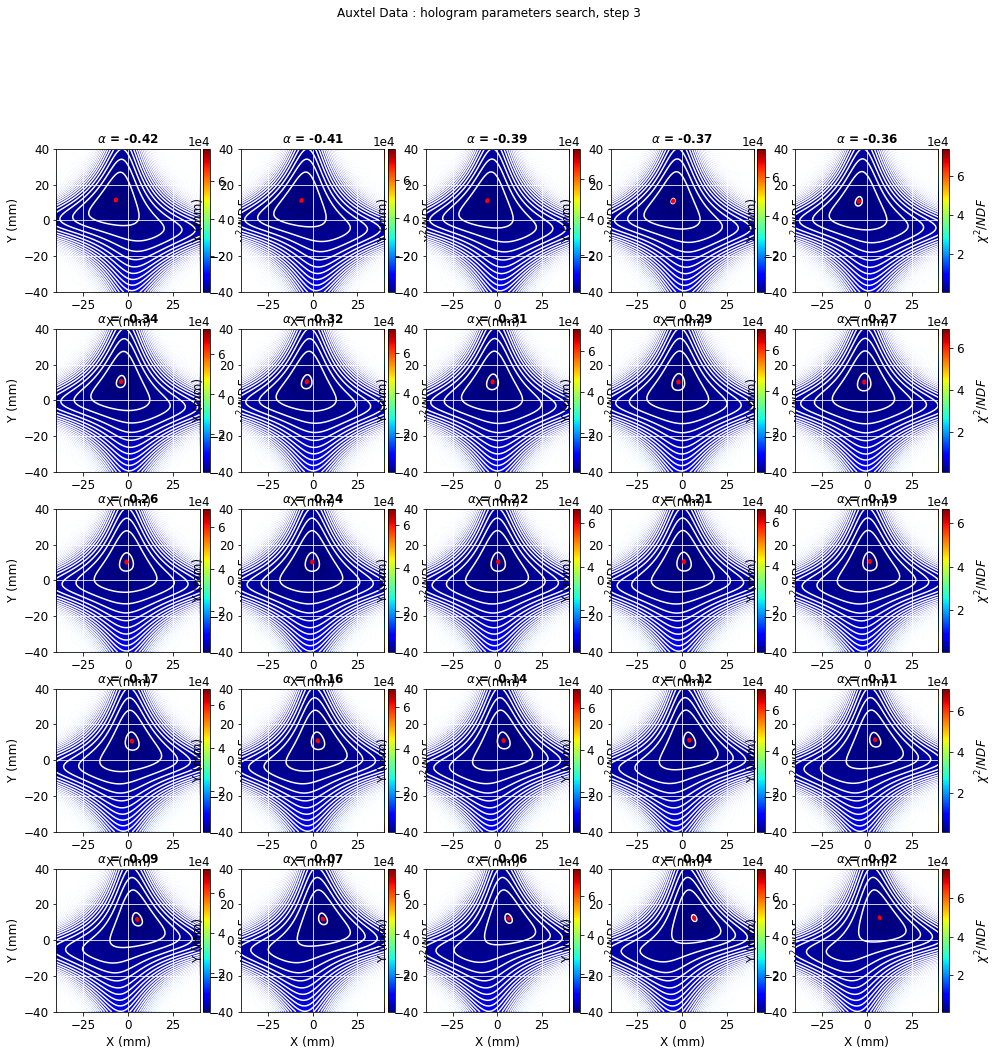

In [95]:
fig = plt.figure(figsize=(16,16))
the_chi2min=np.zeros(Nalpha)
the_locchi2min=[]

# loop on angle
for idx in np.arange(Nalpha):
    ax1=fig.add_subplot(Nrow,Ncol,idx+1)
    the_chi2=chi2(Xdata,Ydata,alphadata,XX_ccd,YY_ccd,alpha_values[idx],c_Z1*zoom,sig=sig_alpha,Npar=2)
    the_chi2min[idx]=the_chi2.min()
    the_locchi2min.append(np.where(the_chi2==the_chi2.min())) # location of chi2min 
    
    divider = make_axes_locatable(ax1)
    cax1 = divider.append_axes('right', size='5%', pad=0.05)
    im1=ax1.imshow(the_chi2,origin="lower",cmap="jet",extent=(XMIN,XMAX,YMIN,YMAX))
    h1 = ax1.contour(X_ccd,Y_ccd,the_chi2,levels=100,colors='w')
    h1b = ax1.contour(X_ccd,Y_ccd,the_chi2,levels=[2.30+the_chi2.min()],colors='r',linewidths=2)
    cbar1=fig.colorbar(im1,cax=cax1,format=cbformat)
    cbar1.ax.get_yaxis().labelpad = 10
    cbar1.ax.set_ylabel('$\\chi^2/NDF$', rotation=90)
    ax1.set_xlabel("X (mm)")
    ax1.set_ylabel("Y (mm)")
    title="$\\alpha$ = {:3.2f}".format(alpha_values[idx])
    ax1.set_title(title,fontweight="bold")
    ax1.grid(color="w")
    
plt.suptitle("Auxtel Data : hologram parameters search, step 3",Y=1)
#plt.tight_layout()


Text(0.5, 1.0, 'AuxTel data step 3 : $\\chi^2$ vs holo angle $\\alpha$')

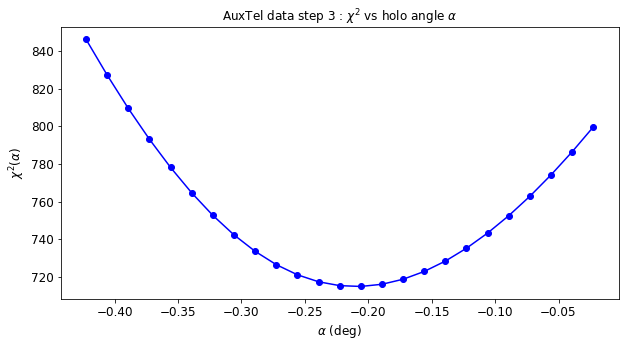

In [96]:
fig = plt.figure(figsize=(10,5))
ax=fig.add_subplot(111)
ax.plot(alpha_values,the_chi2min,'bo-')
ax.set_xlabel("$\\alpha$ (deg)")
ax.set_ylabel("$\\chi^2(\\alpha)$")
ax.set_title("AuxTel data step 3 : $\chi^2$ vs holo angle $\\alpha$")

In [97]:
idx_min=np.where(the_chi2min==the_chi2min.min())[0][0]

In [98]:
assummed_angle_3=alpha_values[idx_min]
assummed_angle_3

-0.20590807297331087

In [99]:
idx_chi2min_y,idx_chi2min_x=the_locchi2min[idx_min]

In [100]:
X0_found_3=X_ccd[idx_chi2min_x][0]
X0_found_3

1.0010010010010006

In [101]:
Y0_found_3=Y_ccd[idx_chi2min_y][0]
Y0_found_3

10.450450450450447

In [102]:
# homothecy
zoom=1.
xx_holo=XYtoxy(XX_ccd,c_Z1*zoom) 
yy_holo=XYtoxy(YY_ccd,c_Z1*zoom) 

# rotation
(xx1_holo,yy1_holo)=xytox1y1_2D(xx_holo,yy_holo,assummed_angle_3,X0_found_3,Y0_found_3)
Z_Phi_ccd_3=dd_phi(xx1_holo,yy1_holo)

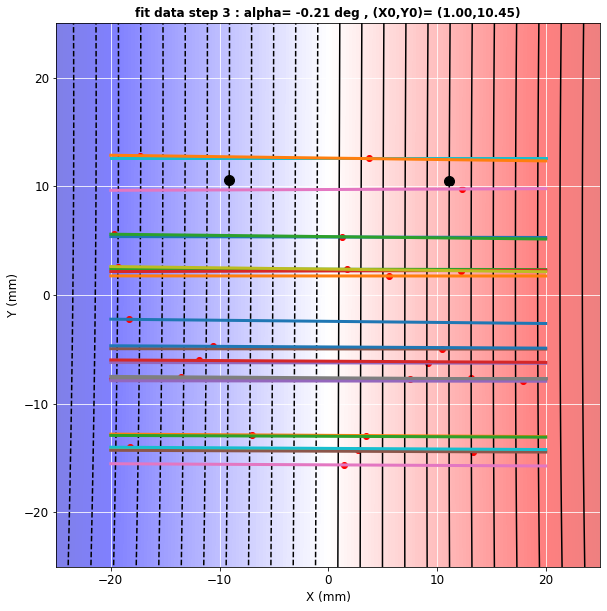

In [103]:
fig=plt.figure(figsize=(10,10))
ax=fig.add_subplot(111)
for idx in np.arange(NumberofPointsData):
    x_i=Xdata[idx]
    y_i=Ydata[idx]
    slope=np.tan(alphadata[idx]*u_degtorad)
    ax.scatter(x_i,y_i,marker="o",color="r")
    x_1=-20
    x_2=20
    y_1=(x_1-x_i)*slope+y_i
    y_2=(x_2-x_i)*slope+y_i
    ax.plot([x_1,x_2],[y_1,y_2],lw=3)
    
    
im=ax.imshow(Z_Phi_ccd_3,origin="lower",cmap="seismic",extent=(XMIN,XMAX,YMIN,YMAX),alpha=0.5)
h = ax.contour(X_ccd,Y_ccd,Z_Phi_ccd_3,levels=50,colors='k')

xy_A = x1y1toxy(xy1_A,assummed_angle_3,X0_found_3,Y0_found_3)
xy_B = x1y1toxy(xy1_B,assummed_angle_3,X0_found_3,Y0_found_3)


XY_A = xytoXY(xy_A,c_Z1*zoom)
XY_B = xytoXY(xy_B,c_Z1*zoom)

ax.scatter(XY_A[0],XY_A[1],marker="o",color="k",s=100)
ax.scatter(XY_B[0],XY_B[1],marker="o",color="k",s=100)


    
ax.set_xlim(-25,25)
ax.set_ylim(-25,25)

ax.set_xlabel("X (mm)")
ax.set_ylabel("Y (mm)")
title="fit data step 3 : alpha= {:3.2f} deg , (X0,Y0)= ({:3.2f},{:3.2f})".format(assummed_angle_3,X0_found_3,Y0_found_3)
ax.set_title(title,fontweight="bold")
ax.grid(color="w")
    